# Preprocessing data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('/content/drive/My Drive/dataset/Iris.csv')
#  Tampilkan 5 data pertama
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# hapus atribut yang tidak digunakan
df.drop(['Id'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

## Bagi menjadi atribut dan label
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_test), len(x_train)

(30, 120)

In [ ]:
y_train

70     Iris-versicolor
42         Iris-setosa
51     Iris-versicolor
73     Iris-versicolor
126     Iris-virginica
            ...       
98     Iris-versicolor
13         Iris-setosa
10         Iris-setosa
82     Iris-versicolor
77     Iris-versicolor
Name: Species, Length: 120, dtype: object

# SVM

In [ ]:
from sklearn import svm

# Create Model
model_svm = svm.SVC(kernel='rbf')
# Training model
model_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predict model
pred_svm = model_svm.predict(x_test)
# Evaluate using data test
accuracy = (pred_svm == y_test).sum()/len(y_test)
accuracy

0.9

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_svm, y_test)
cm

array([[11,  0,  0],
       [ 0,  6,  2],
       [ 0,  1, 10]])

# ANN

## SKLearn

In [ ]:
from sklearn.neural_network import MLPClassifier
# Create model
model_mlp = MLPClassifier(hidden_layer_sizes=(8,16,32,64,32,8,4))
# Training model
model_mlp.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 16, 32, 64, 32, 8, 4),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [ ]:
# Predict model
pred_mlp = model_mlp.predict(x_test)
# Evaluate using data test
accuracy = (pred_mlp == y_test).sum()/len(y_test)
accuracy

0.7333333333333333

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_mlp, y_test)
cm

array([[ 8,  8,  0],
       [ 0,  0,  0],
       [ 0,  0, 14]])

## Keras Tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('/content/drive/My Drive/dataset/Iris.csv')
#  Tampilkan 5 data pertama
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# hapus atribut yang tidak digunakan
df.drop(['Id'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Bagi menjadi atribut dan label
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

len(x_test), len(x_train), len(x_val)

(30, 96, 24)

In [ ]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(10,activation='relu', input_shape=(4,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
3/3 [==============================] - 0s 67ms/step - loss: 0.9334 - accuracy: 0.3125 - val_loss: 0.8911 - val_accuracy: 0.3750
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 0.9221 - accuracy: 0.3125 - val_loss: 0.8831 - val_accuracy: 0.3750
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 0.9129 - accuracy: 0.3125 - val_loss: 0.8768 - val_accuracy: 0.3750
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 0.9062 - accuracy: 0.3333 - val_loss: 0.8718 - val_accuracy: 0.3750
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 0.8996 - accuracy: 0.4062 - val_loss: 0.8672 - val_accuracy: 0.5417
Epoch 6/200
3/3 [==============================] - 0s 7ms/step - loss: 0.8943 - accuracy: 0.5104 - val_loss: 0.8628 - val_accuracy: 0.5833
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 0.8892 - accuracy: 0.5938 - val_loss: 0.8590 - val_accuracy: 0.6250
Epoch 8/200
3/3 [=========

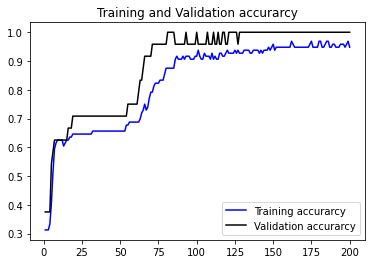

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.figure()
plt.plot(epochs, acc, 'blue', label='Training accurarcy')
plt.plot(epochs, val_acc, 'black', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Show Plot
plt.show()

In [ ]:
import numpy as np
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

accuracy = (y_pred_class == y_test_class).sum()/len(y_test_class)
accuracy

0.9666666666666667

In [ ]:
y_pred

array([[9.9775380e-01, 8.8218675e-04, 1.3640167e-03],
       [9.9613959e-01, 1.5771877e-03, 2.2832139e-03],
       [9.9634212e-01, 1.4886531e-03, 2.1692128e-03],
       [7.2439318e-05, 5.7869560e-01, 4.2123199e-01],
       [8.2880179e-05, 9.3320054e-01, 6.6716596e-02],
       [3.7737851e-07, 3.4506436e-02, 9.6549314e-01],
       [3.9305405e-06, 1.7707655e-01, 8.2291955e-01],
       [9.9202192e-01, 3.5743895e-03, 4.4037206e-03],
       [9.9574727e-01, 1.7625482e-03, 2.4902679e-03],
       [9.0402982e-06, 3.0614585e-01, 6.9384515e-01],
       [1.3270977e-02, 8.1998909e-01, 1.6673993e-01],
       [1.5161086e-04, 9.2144859e-01, 7.8399792e-02],
       [9.9705768e-01, 1.1786764e-03, 1.7635941e-03],
       [1.4984975e-05, 6.1115181e-01, 3.8883319e-01],
       [7.7799767e-09, 5.1457467e-03, 9.9485427e-01],
       [9.8647618e-01, 6.3351355e-03, 7.1885758e-03],
       [5.3097967e-05, 8.5412627e-01, 1.4582069e-01],
       [8.2771345e-07, 9.3733847e-02, 9.0626526e-01],
       [3.0344152e-06, 9.338

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_class, y_test_class)
cm

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 11]])